# Support Vector Machine

## Our Ingredients 

First we will import numpy to easily manage linear algebra and calculus operations in python. To plot the learning progress later on, we will use matplotlib.

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Stochastic Gradient Descent

As for the perceptron, we use python 3 and numpy. The svm will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function. 

### Calculating the Error 

To calculate the error of a prediction we first need to define the objective function of the svm. 

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))= 
\begin{cases}
    0,& \text{if } y*f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function 

As we defined the loss function, we can now define the objective function for the svm:

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$

$$ \lambda=\frac {1}{epoch} $$

As you can see, our objective of a svm consists of two terms. The first term is a regularizer, the second term the loss. The regularizer balances between margin maximization and loss. 

#### Derive the Objective Function

To minimize this function, we need the gradients of this function.

As we have two terms, we will derive them seperately using the sum rule in differentiation.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$

$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}
$$

This means, if we have a misclassified sample $x_i$, respectively $y_i \langle x_i,w \rangle \ < \ 1$, we update the weight vector w using the gradients of both terms, if $y_i \langle x_i,w \rangle \geq 1$ we just update w by the gradient of the regularizer. To sum it up, our stochastic gradient descent for the svm looks like this:

if $y_i⟨x_i,w⟩ < 1$:
$$
w = w + \eta (y_ix_i - 2\lambda w)
$$
else:
$$
w = w + \eta (-2\lambda w)
$$

### Our Data Set 

First we need to define a labeled data set. 

In [27]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])

For simplicity's sake we again fold the bias term into the data set:

In [28]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])

y = np.array([-1,-1,1,1,1])

This small toy data set contains two samples labeled with $-1$ and three samples labeled with $+1$. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable:

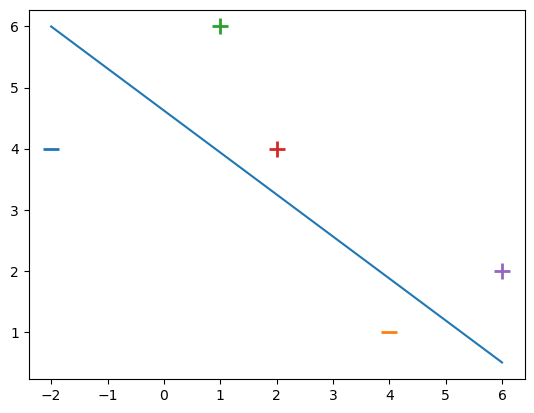

In [29]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2,6],[6,0.5])

## Lets Start implementing Stochastic Gradient Descent 

Finally we can code our SGD algorithm using our update rules. In opposite to the perceptrons objective function, we use a regularizer in our algorithm. As we have a small data set, which is easily lineary seperable, this is actually not needed and our stochastic gradient descent algorithm would probably converge faster without it. To give you a more powerfull code at hand, I will keep it in the following algorithm.

To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

#### Code Description Line by Line

line <b>2</b>: Initialize the weight vector for the perceptron with zeros<br>
line <b>3</b>: Set the learning rate to 1<br>
line <b>4</b>: Set the number of epochs<br>
line <b>6</b>: Iterate n times over the whole data set. The Iterator is begins with $1$ to avoid division by zero during regularization  parameter calculation<br>
line <b>7</b>: Iterate over each sample in the data set. <br>
line <b>8</b>: Misclassification condition $y_i \langle x_i,w \rangle < 1$<br>
line <b>9</b>: Update rule for the weights $w = w + \eta (y_ix_i - 2\lambda w)$ including the learning rate $\eta$ and the regularizer $\lambda$<br>
line <b>11</b>: If classified correctly just update the weight vector by the derived regularizer term $w = w + \eta (-2\lambda w)$.<br>

In [30]:
def svm_sgd(X, Y):
    ########## start ###########
    w = np.zeros(X.shape[1]) #设置w的
    ##########  end  ###########
    eta = 1 #学习率
    epochs = 100000

    for epoch in range(1,epochs):
        for i, x in enumerate(X):
            ########## start ###########
            if Y[i]*np.dot(x, w)<1:
                w = w + eta * (Y[i] * x - 2 * w / epoch)
            else:
                w = w - eta * 2 * w / epoch
            ##########  end  ###########

    return w

We will run the sgd $100000$ times. Our learning parameter eta is set to $1$. As a regulizing parameter we choose $1/t$, so this parameter will decrease, as the number of epochs increases.

The weight vector of the SVM including the bias term after 100000 epochs is $(w[0],w[1], w[2])$.<br>
We can extract the following prediction function now:


$$
f(x) = \langle x,(w[0],w[1])\rangle - w[2]
$$

The weight vector is $(w[0],w[1])$ and the bias term is the third entry $w[2]$

In [31]:
w = svm_sgd(X, y)
print(w)

[ 1.58876117  3.17458055 11.11863105]


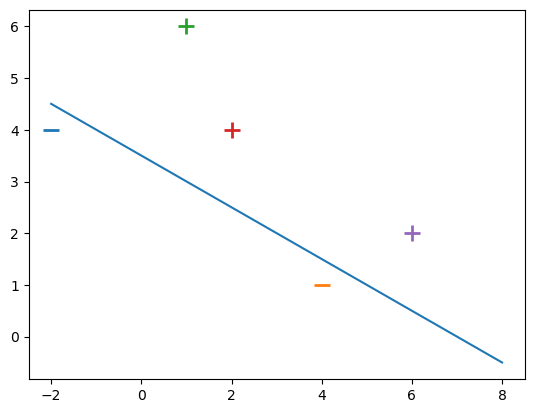

In [32]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# 根据计算得到的参数w,画出超平面，其中点的坐标在图上的位置已经画好。
# 提示：使用超平面方程定义好横纵坐标，使用matplotlib作图。
########## start ###########
x1 = np.arange(-2,9,1)
x2 = (-x1*w[0]+w[2])/w[1]
plt.plot(x1,x2)
##########  end  ###########